In [1]:
from tensorflow.keras.layers import Input,Reshape,Flatten,Dense,Dropout,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization,Activation,LeakyReLU,UpSampling2D,Conv2D
from keras.models import Sequential
from tensorflow.keras import optimizers,Input,models,layers,metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

import numpy as np
import matplotlib.pyplot as plt

In [2]:

!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 5.27 MiB/s, done.


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
train_generator=train_datagen.flow_from_directory('./data-ch20/train',
                                                  target_size=(150,150),
                                                  batch_size=5,
                                                  class_mode='binary')
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory('./data-ch20/test',
                                                target_size=(150,150),
                                                batch_size=5,
                                                class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [4]:
transfer_model=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
transfer_model.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))

finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [6]:
finetune_model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),metrics=['accuracy'])
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5)

In [7]:
history=finetune_model.fit(train_generator,epochs=20,validation_data=test_generator,validation_steps=10,callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 13s 49ms/step - loss: 0.8013 - accuracy: 0.4875 - val_loss: 0.5010 - val_accuracy: 0.8000
Epoch 2/20
32/32 [==============================] - 1s 44ms/step - loss: 0.5361 - accuracy: 0.7437 - val_loss: 0.3926 - val_accuracy: 0.9200
Epoch 3/20
32/32 [==============================] - 1s 43ms/step - loss: 0.4278 - accuracy: 0.8250 - val_loss: 0.3315 - val_accuracy: 0.9000
Epoch 4/20
32/32 [==============================] - 1s 43ms/step - loss: 0.3918 - accuracy: 0.8250 - val_loss: 0.3295 - val_accuracy: 0.8400
Epoch 5/20
32/32 [==============================] - 1s 43ms/step - loss: 0.3227 - accuracy: 0.9000 - val_loss: 0.2639 - val_accuracy: 0.9000
Epoch 6/20
32/32 [==============================] - 1s 43ms/step - loss: 0.3095 - accuracy: 0.8875 - val_loss: 0.2996 - val_accuracy: 0.9000
Epoch 7/20
32/32 [==============================] - 1s 42ms/step - loss: 0.2885 - accuracy: 0.8938 - val_loss: 0.2615 - val_accuracy: 0.9200
Epoch 8/20
3

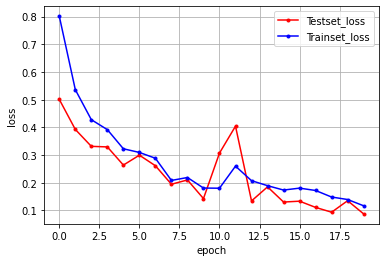

In [8]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()